# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

# Loading dataset

In [2]:
dataset=pd.read_csv('C:\\Users\\USER\\Desktop\\mamo\\Cleaned_data.csv')
dataset.head(5)

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5,67,3,5,3,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,57,1,5,3,1
4,5,76,1,4,3,1


# Exploratory data analysis

In [3]:
dataset.isnull().sum()

BI-RADS     0
Age         0
Shape       0
Margin      0
Density     0
Severity    0
dtype: int64

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   BI-RADS   830 non-null    int64
 1   Age       830 non-null    int64
 2   Shape     830 non-null    int64
 3   Margin    830 non-null    int64
 4   Density   830 non-null    int64
 5   Severity  830 non-null    int64
dtypes: int64(6)
memory usage: 39.0 KB


In [5]:
dataset.describe()

,BI-RADS,Age,Shape,Margin,Density,Severity
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.393976,55.781928,2.781928,2.813253,2.915663,0.485542
std,1.888371,14.671782,1.242361,1.567175,0.350936,0.500092
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [10]:
dataset['BI-RADS'].value_counts()

4     468
5     316
3      24
6       9
2       7
0       5
55      1
Name: BI-RADS, dtype: int64

In [11]:
dataset.dtypes

BI-RADS     int64
Age         int64
Shape       int64
Margin      int64
Density     int64
Severity    int64
dtype: object

In [12]:
dataset.columns

Index(['BI-RADS', 'Age', 'Shape', 'Margin', 'Density', 'Severity'], dtype='object')

# Data Vizualising

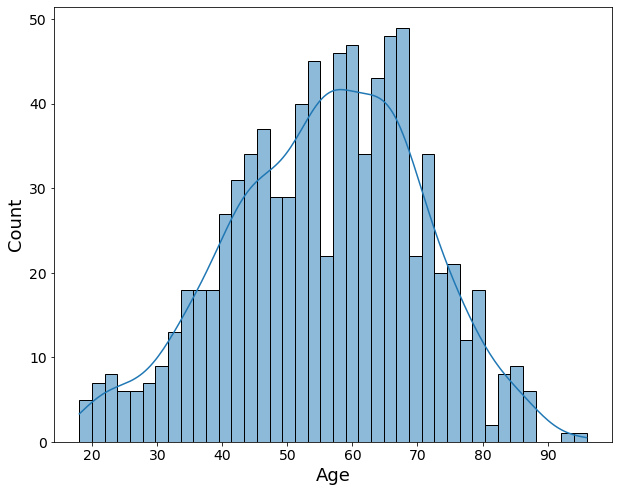

In [14]:
fig, axes = plt.subplots(1, 1, figsize=(10, 8))
sns.histplot(x="Age", kde=True, data=dataset, ax=axes, bins=40);
axes.set(xlabel="Age");
axes.xaxis.label.set_size(18)
axes.yaxis.label.set_size(18)
axes.tick_params('y', labelsize = 14);
axes.tick_params('x', labelsize = 14);

<AxesSubplot:xlabel='Age'>

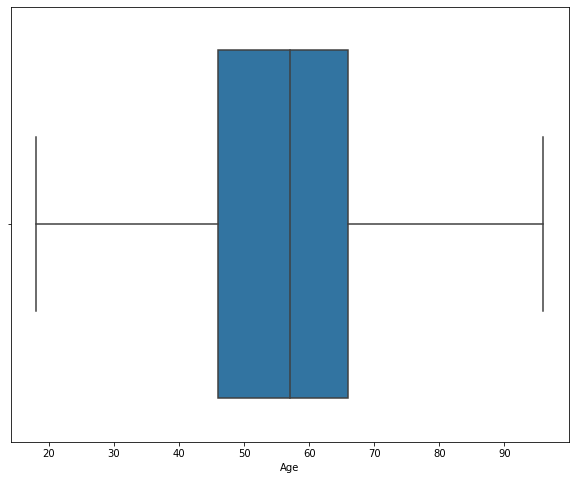

In [15]:
fig, axes = plt.subplots(1, 1, figsize=(10, 8))
sns.boxplot(x='Age', data=dataset)

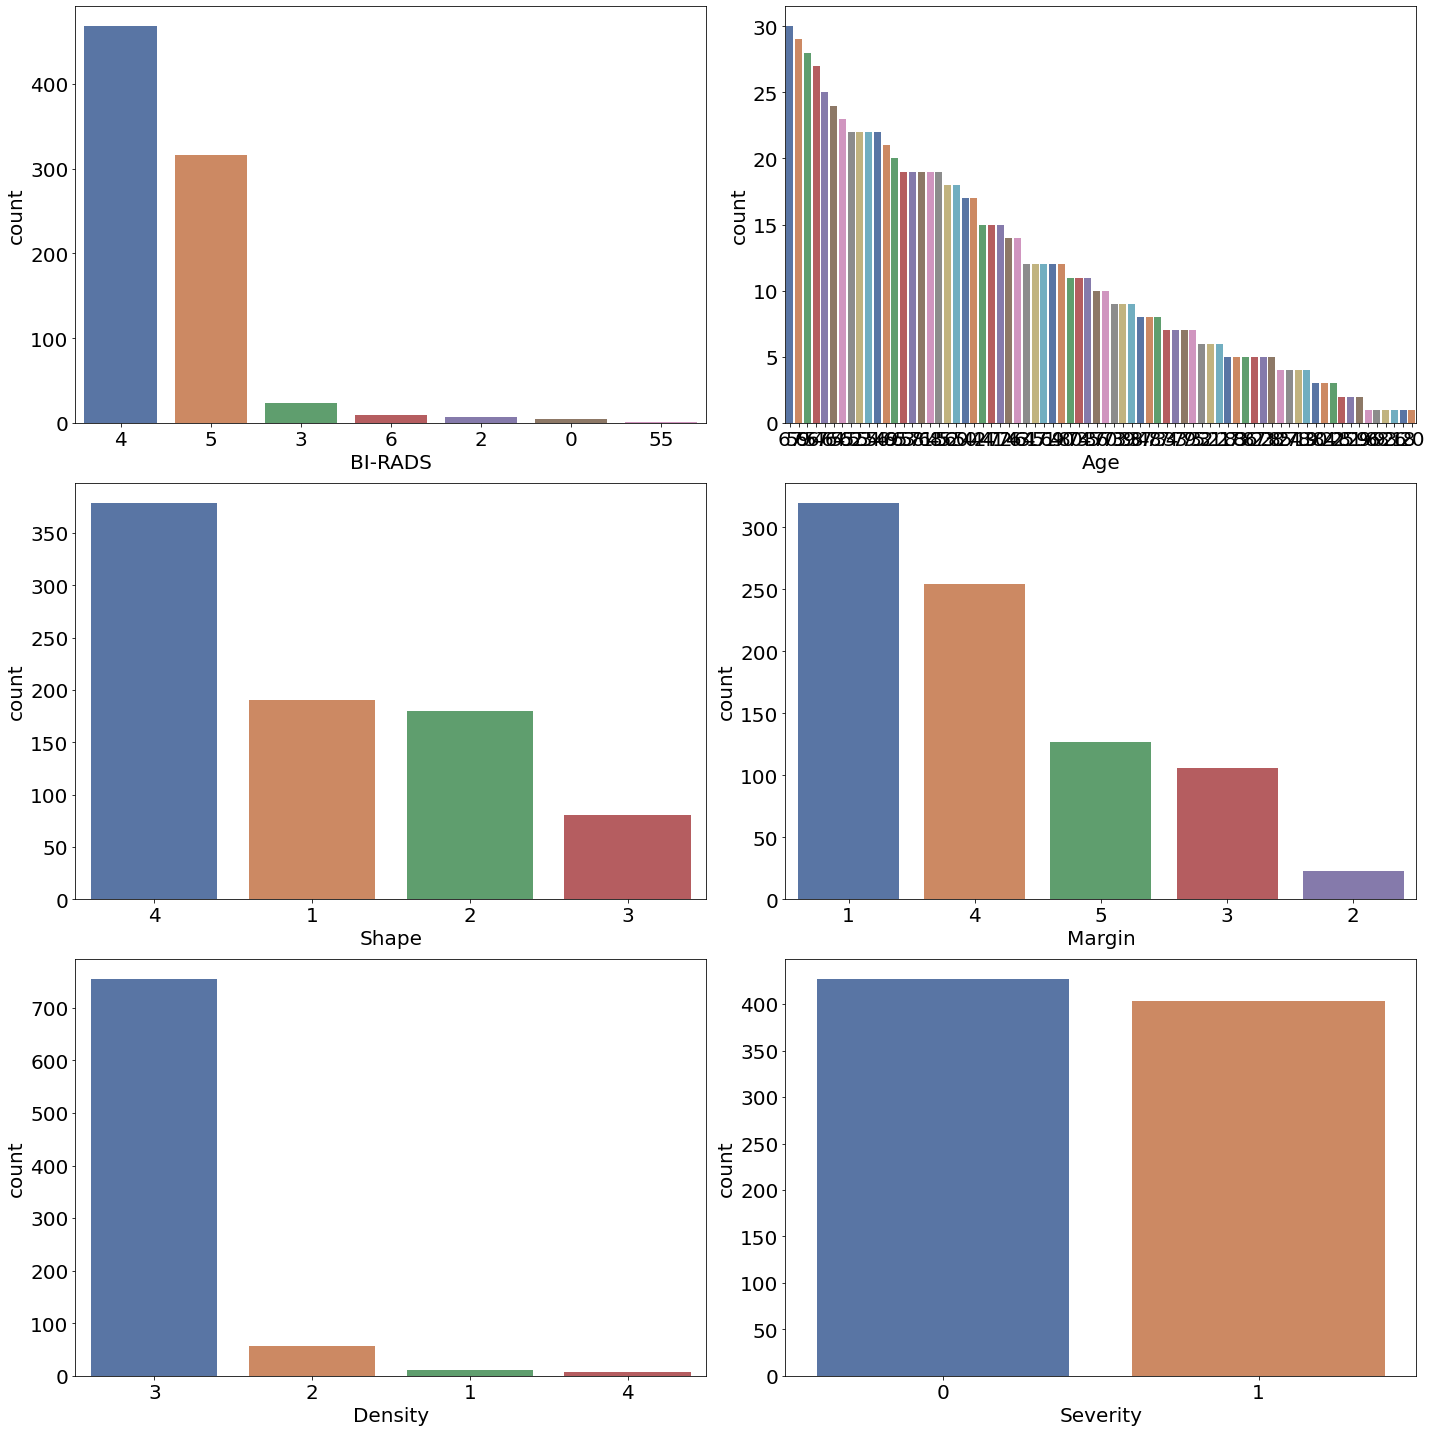

In [16]:
fig, ax = plt.subplots(3, 2, figsize=(20, 20));
for variable, subplot in zip(dataset.columns, ax.flatten()):
    subplot.xaxis.label.set_size(20)
    subplot.yaxis.label.set_size(20)
    subplot.tick_params('y', labelsize = 20);
    subplot.tick_params('x', labelsize = 20);
    cp = sns.countplot(x=dataset[variable], ax=subplot, palette='deep', order =
    dataset[variable].value_counts().index);
plt.tight_layout()

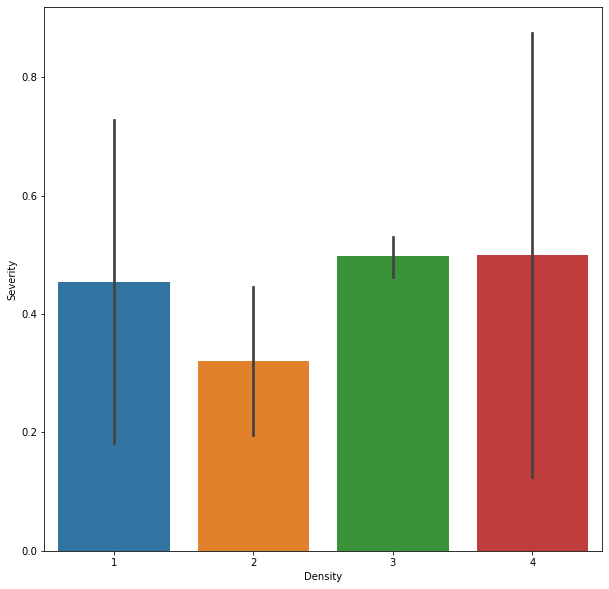

In [17]:
fig = plt.figure(figsize=(10, 10))
sns.barplot(data=dataset, y = 'Severity', x='Density')
subplot.xaxis.label.set_size(20)
subplot.yaxis.label.set_size(20)
subplot.tick_params('y', labelsize = 20);
subplot.tick_params('x', labelsize = 20);

<AxesSubplot:>

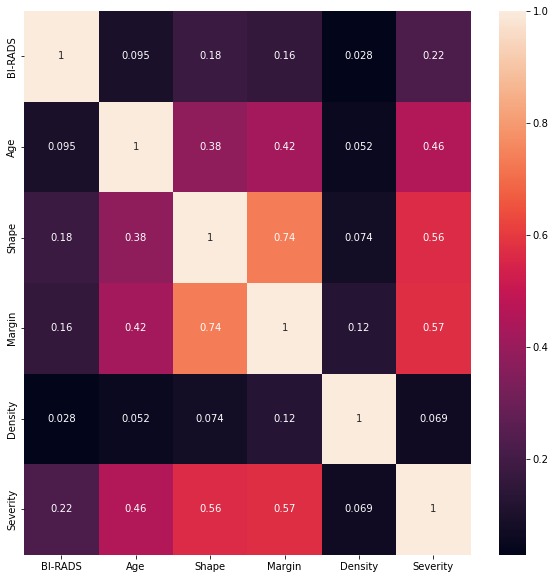

In [18]:
 fig = plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(), annot=True)

In [19]:
X = dataset.drop(columns=['Severity'],axis=1)
y = dataset['Severity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [20]:
model_1= DecisionTreeClassifier(random_state= 42)
model_1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [21]:
y_pred = model_1.predict(X_test)
accuracy_score(y_pred, y_test)

0.7951807228915663

In [22]:
model_2= SVC(C = 1.0, kernel = 'linear')
model_2.fit(X_train, y_train)

SVC(kernel='linear')

In [23]:
y_pred = model_2.predict(X_test)
accuracy_score(y_pred, y_test)

0.8433734939759037

In [24]:
model_3= LogisticRegression()
model_3.fit(X_train, y_train)

LogisticRegression()

In [25]:
y_pred = model_3.predict(X_test)
accuracy_score(y_pred, y_test)

0.8313253012048193

In [26]:
model_4= neighbors.KNeighborsClassifier(n_neighbors=10)
model_4.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [27]:
y_pred = model_4.predict(X_test)
accuracy_score(y_pred, y_test)

0.8072289156626506

In [28]:
model_5 = RandomForestClassifier(n_estimators=2)
model_5.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2)

In [29]:
y_pred = model_5.predict(X_test)
accuracy_score(y_pred, y_test)

0.8012048192771084

In [30]:
score = cross_val_score(model_2, X, y, cv = 10)
score.mean()

0.8240963855421686

0.8266666666666667

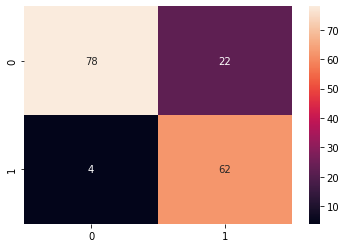

In [31]:
sns.heatmap(confusion_matrix(model_2.predict(X_test), y_test),annot=True)
f1_score(model_2.predict(X_test), y_test)